**Lab 5 by Sughandhan S**


PLEASE MAKE SURE THE DATASETS HAVE NO EMPTY LINES

#Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Q1) Building a KNN model


#Preparing training data

In [ ]:
train_data = open("knn-train.txt")

In [ ]:
training = train_data.read()
train_data.seek(0)
training = training.split('\n')

In [ ]:
training

['41.42997251019192 \t 153.7575426971103 \t -1.0',
 '46.50559515792325 \t 163.04433527806478 \t 1.0',
 '41.34754946790106 \t 158.45488497317905 \t -1.0',
 '42.02522665463705 \t 155.65045933840824 \t 1.0',
 '42.291784107494976 \t 151.2331622349443 \t -1.0',
 '43.36154889745602 \t 157.20390084835074 \t -1.0',
 '42.569984757319595 \t 154.15551719137073 \t -1.0',
 '46.53855846425467 \t 159.62446668182275 \t 1.0',
 '41.45075591048918 \t 158.6617240810363 \t -1.0',
 '45.44052009532324 \t 157.6281992742456 \t 1.0',
 '43.3413709788864 \t 157.05134806065544 \t 1.0',
 '46.68557068239204 \t 161.231687157704 \t 1.0',
 '42.611157073069116 \t 163.54397714055605 \t 1.0',
 '46.90549135475654 \t 162.36898649856252 \t 1.0',
 '44.2452471041846 \t 155.89742970440665 \t -1.0',
 '44.355015136134874 \t 156.25777159929885 \t -1.0',
 '40.673788312062065 \t 157.26130169509625 \t -1.0',
 '45.35632735280396 \t 159.75924535681682 \t 1.0',
 '43.28577747758065 \t 159.06637861244243 \t 1.0',
 '43.60874428893548 \t 16

In [ ]:
train_features = []
train_labels =[]
cluster_1 = []
cluster_2 = []
for i in range(len(training)):
  x1, x2, y = training[i].split('\t')
  train_features.append((float(x1), float(x2)))
  train_labels.append(float(y))
  if float(y)==1:
    cluster_1.append((float(x1), float(x2)))
  else:
    cluster_2.append((float(x1), float(x2)))

In [ ]:
train_features = np.array(train_features)
train_features

array([[ 41.42997251, 153.7575427 ],
       [ 46.50559516, 163.04433528],
       [ 41.34754947, 158.45488497],
       ...,
       [ 42.27670986, 161.52002752],
       [ 42.12093564, 159.83871662],
       [ 45.19746302, 158.59564482]])

In [ ]:
train_labels = np.array(train_labels)
train_labels

array([-1.,  1., -1.,  1., -1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1.,
        1., -1., -1., -1.,  1.,  1.,  1., -1.,  1., -1., -1., -1.,  1.,
       -1.,  1.,  1.,  1., -1., -1.,  1., -1.,  1.,  1., -1., -1.,  1.,
       -1.,  1.,  1.,  1., -1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1.,
       -1.,  1., -1., -1., -1.,  1.,  1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1.,  1.,  1.,  1., -1., -1.,  1., -1., -1.,  1., -1.,
        1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1., -1.,
       -1., -1.,  1.,  1.,  1., -1.,  1.,  1., -1., -1., -1., -1.,  1.,
        1., -1.,  1., -1., -1., -1., -1.,  1.,  1., -1.,  1.,  1.,  1.,
        1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1.,
       -1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,
        1.,  1.,  1., -1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1., -1.,
       -1., -1., -1., -1.,  1., -1.,  1., -1.,  1., -1.,  1., -1.,  1.,
        1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1., -1

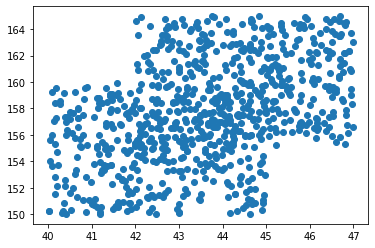

In [ ]:
plt.scatter(train_features[:,0], train_features[0:,1])

In [ ]:
train_features[:,0]

array([41.42997251, 46.50559516, 41.34754947, 42.02522665, 42.29178411,
       43.3615489 , 42.56998476, 46.53855846, 41.45075591, 45.4405201 ,
       43.34137098, 46.68557068, 42.61115707, 46.90549135, 44.2452471 ,
       44.35501514, 40.67378831, 45.35632735, 43.28577748, 43.60874429,
       41.74164707, 44.64051896, 44.16116249, 42.34683214, 40.25797425,
       43.92283372, 44.62537576, 43.14069102, 43.85658284, 43.00123247,
       43.13748617, 43.0449224 , 46.55742491, 41.33904643, 45.21030421,
       46.44749028, 44.7341319 , 42.68796636, 46.09426179, 41.87993956,
       45.34154443, 43.7170402 , 44.42028952, 43.9812326 , 43.30473741,
       42.71844551, 42.12151308, 43.80012487, 42.31545113, 41.21646719,
       41.21188691, 45.35633562, 44.32418233, 43.00933347, 41.57768489,
       42.96088294, 44.15472641, 45.39479889, 43.74347388, 42.62947943,
       41.86629739, 43.17440396, 43.48946196, 43.55212234, 41.59821199,
       40.19598642, 42.12444594, 43.53831548, 45.02206857, 44.24

In [ ]:
cluster_1 = np.array(cluster_1)
cluster_2 = np.array(cluster_2)

In [ ]:
cluster_1

array([[ 46.50559516, 163.04433528],
       [ 42.02522665, 155.65045934],
       [ 46.53855846, 159.62446668],
       [ 45.4405201 , 157.62819927],
       [ 43.34137098, 157.05134806],
       [ 46.68557068, 161.23168716],
       [ 42.61115707, 163.54397714],
       [ 46.90549135, 162.3689865 ],
       [ 45.35632735, 159.75924536],
       [ 43.28577748, 159.06637861],
       [ 43.60874429, 163.16310847],
       [ 44.64051896, 156.00167905],
       [ 43.92283372, 158.97362483],
       [ 43.14069102, 160.2845435 ],
       [ 43.85658284, 162.34537802],
       [ 43.00123247, 162.45832232],
       [ 46.55742491, 159.34091245],
       [ 45.21030421, 159.7889814 ],
       [ 46.44749028, 159.68861594],
       [ 46.09426179, 156.49876582],
       [ 45.34154443, 159.03688231],
       [ 43.7170402 , 155.29628402],
       [ 44.42028952, 160.06512918],
       [ 43.30473741, 160.48040094],
       [ 42.71844551, 163.49617512],
       [ 42.12151308, 156.52193265],
       [ 42.31545113, 155.52803647],
 

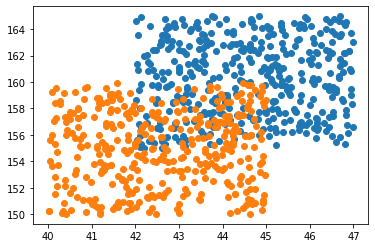

In [ ]:
plt.scatter(cluster_1[:, 0], cluster_1[:, 1])
plt.scatter(cluster_2[:, 0], cluster_2[:, 1])
plt.show()

#Preparing test data

In [ ]:
test_data = open("knn-test.txt")

In [ ]:
testing = test_data.read()
testing = testing.split('\n')
testing

['43.64148324548282 \t 159.0597595185634 \t 1.0',
 '42.03483686773609 \t 151.90326651233048 \t -1.0',
 '41.60061225119419 \t 150.81250711721637 \t -1.0',
 '44.583628250572275 \t 154.81965628895608 \t -1.0',
 '43.808657839176156 \t 153.44405383789154 \t -1.0',
 '46.47468313675485 \t 156.6974040815969 \t 1.0',
 '43.18312264381932 \t 157.72104459277585 \t -1.0',
 '43.8341676227268 \t 152.55828213157196 \t -1.0',
 '42.62211636409991 \t 157.44546380265191 \t -1.0',
 '46.139318059483884 \t 162.44243415966568 \t 1.0',
 '42.501790424054505 \t 161.60992613511374 \t 1.0',
 '42.438613997218 \t 150.2143627299896 \t -1.0',
 '40.59049708562708 \t 153.8047799613595 \t -1.0',
 '40.88396578928364 \t 153.90931498433972 \t -1.0',
 '43.294221301944965 \t 158.21664217121725 \t -1.0',
 '41.221640692619 \t 155.20630124984567 \t -1.0',
 '46.41039105692988 \t 156.95772103568646 \t 1.0',
 '40.89987319673059 \t 157.34605194551935 \t -1.0',
 '44.648743322195074 \t 158.08067328070885 \t -1.0',
 '41.677076336087424

In [ ]:
test_features = []
test_labels =[]
for i in range(len(testing)):
  x1, x2, y = testing[i].split('\t')
  test_features.append((float(x1), float(x2)))
  test_labels.append(float(y))

In [ ]:
test_labels

[1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 1.

In [ ]:
test_features = np.array(test_features)
test_features

array([[ 43.64148325, 159.05975952],
       [ 42.03483687, 151.90326651],
       [ 41.60061225, 150.81250712],
       [ 44.58362825, 154.81965629],
       [ 43.80865784, 153.44405384],
       [ 46.47468314, 156.69740408],
       [ 43.18312264, 157.72104459],
       [ 43.83416762, 152.55828213],
       [ 42.62211636, 157.4454638 ],
       [ 46.13931806, 162.44243416],
       [ 42.50179042, 161.60992614],
       [ 42.438614  , 150.21436273],
       [ 40.59049709, 153.80477996],
       [ 40.88396579, 153.90931498],
       [ 43.2942213 , 158.21664217],
       [ 41.22164069, 155.20630125],
       [ 46.41039106, 156.95772104],
       [ 40.8998732 , 157.34605195],
       [ 44.64874332, 158.08067328],
       [ 41.67707634, 154.65727276],
       [ 41.74316736, 157.59983676],
       [ 45.3503402 , 158.47609669],
       [ 40.87314076, 159.8314055 ],
       [ 43.33472928, 157.54776628],
       [ 44.07705111, 161.15065657],
       [ 46.46930383, 156.9196901 ],
       [ 44.21752063, 157.06591256],
 

Function for finding distance

In [ ]:
def distance(train, test):
  dist = []
  index = 0
  for i in train:
    dist.append((np.linalg.norm(i-test), index))
    index+=1
  dist.sort()
  return dist

# Q1) starts here


In [ ]:
k=int(input())

11


train_features,
train_labels,
test_features,
test_labels

In [ ]:
def knn_acc(train, train_labels, test, test_labels, k):
  pred = []
  for i in test:
    dist = distance(train, i)
    sum = 0
    for j in range(k):
      if train_labels[dist[j][1]] == 1.0:
        sum+=1
      else:
        sum-=1
    if sum>0:
      pred.append(1.0)
    else:
      pred.append(-1.0)
  c=0
  for i in range(len(test_labels)):
    if test_labels[i]==pred[i]:
      c+=1
  return c/len(test_labels)



In [ ]:
prediction = knn_acc(train_features, train_labels, test_features, test_labels, k)

In [ ]:
prediction

0.92

In [ ]:
k_max = int(input())

29


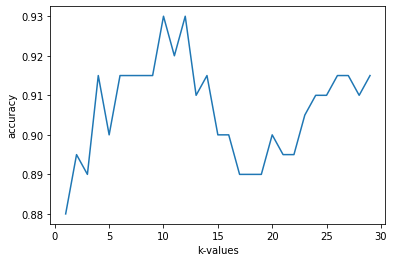

In [ ]:
acc=[]
for k in range(1, k_max+1):
  acc.append(knn_acc(train_features, train_labels, test_features, test_labels, k))
plt.plot(range(1, k_max+1), acc)
plt.xlabel("k-values")
plt.ylabel("accuracy")
plt.show()

#Q2) Perceptron Classifier

In [86]:
train_data = open("perceptron-train.txt")

In [87]:
train_data.seek(0)
train_data.read()
train_data.seek(0)

0

In [88]:
training = train_data.read()
training = training.split('\n')
training

['-0.600256070013883 \t 158.21380690004207 \t -1.0',
 '-4.348697815368335 \t 152.14472710728262 \t -1.0',
 '-2.5565061087908116 \t 158.9665690300399 \t -1.0',
 '-4.272535237807944 \t 159.0351453513336 \t -1.0',
 '-4.5026561950085755 \t 154.0502356690818 \t -1.0',
 '4.4113069464872865 \t 160.1017154823464 \t 1.0',
 '4.221974360844992 \t 155.38930876857762 \t 1.0',
 '-3.454682729776665 \t 154.8617157694956 \t -1.0',
 '1.2935884524940302 \t 156.6719789824474 \t 1.0',
 '0.5745408911568677 \t 161.10538945338286 \t 1.0',
 '4.3841101931888495 \t 160.22730173259228 \t 1.0',
 '0.6803926392890278 \t 159.72990915918518 \t 1.0',
 '-2.9537324529520874 \t 159.82319850189668 \t -1.0',
 '1.5982481515161797 \t 158.26689487815025 \t 1.0',
 '4.717157540645158 \t 161.40496728579944 \t 1.0',
 '-3.7134319044107977 \t 153.65742644038372 \t -1.0',
 '-2.4224570949588435 \t 159.40456430509184 \t -1.0',
 '3.5952717920820847 \t 161.0873859070201 \t 1.0',
 '3.618867605313081 \t 163.1475039081092 \t 1.0',
 '1.88591

make sure the file does not contain any empty lines

In [89]:
train_features = []
train_labels =[]
class_1 = []
class_2 = []
for i in range(len(training)):
  x1, x2, y = training[i].split('\t')
  lst = [float(x1), float(x2)]
  train_features.append(np.array(lst))
  train_labels.append((float(y)))
  if float(y)==1:
    class_1.append(np.array(lst))
  else:
    class_2.append(np.array(lst))

In [90]:
train_features

[array([ -0.60025607, 158.2138069 ]),
 array([ -4.34869782, 152.14472711]),
 array([ -2.55650611, 158.96656903]),
 array([ -4.27253524, 159.03514535]),
 array([ -4.5026562 , 154.05023567]),
 array([  4.41130695, 160.10171548]),
 array([  4.22197436, 155.38930877]),
 array([ -3.45468273, 154.86171577]),
 array([  1.29358845, 156.67197898]),
 array([  0.57454089, 161.10538945]),
 array([  4.38411019, 160.22730173]),
 array([  0.68039264, 159.72990916]),
 array([ -2.95373245, 159.8231985 ]),
 array([  1.59824815, 158.26689488]),
 array([  4.71715754, 161.40496729]),
 array([ -3.7134319 , 153.65742644]),
 array([ -2.42245709, 159.40456431]),
 array([  3.59527179, 161.08738591]),
 array([  3.61886761, 163.14750391]),
 array([  1.88591288, 157.14334801]),
 array([  3.14540821, 164.16244167]),
 array([ -0.31316373, 153.2607136 ]),
 array([  2.68765656, 161.23996667]),
 array([ -5.08458943, 153.01320899]),
 array([ -5.18926   , 158.37008448]),
 array([ -4.78233688, 159.97182439]),
 array([ -0.

In [91]:
class_1 = np.array(class_1)
class_2 = np.array(class_2)
train_features = np.array(train_features)
train_labels = np.array(train_labels)

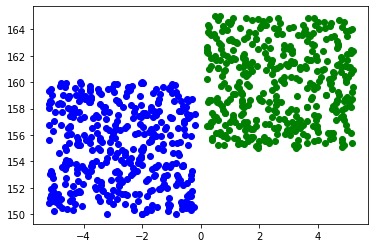

In [92]:
plt.scatter(class_1[:,0], class_1[:,1], color='g')
plt.scatter(class_2[:,0], class_2[:,1], color='b')
plt.show()

In [93]:
class_1

array([[  4.41130695, 160.10171548],
       [  4.22197436, 155.38930877],
       [  1.29358845, 156.67197898],
       [  0.57454089, 161.10538945],
       [  4.38411019, 160.22730173],
       [  0.68039264, 159.72990916],
       [  1.59824815, 158.26689488],
       [  4.71715754, 161.40496729],
       [  3.59527179, 161.08738591],
       [  3.61886761, 163.14750391],
       [  1.88591288, 157.14334801],
       [  3.14540821, 164.16244167],
       [  2.68765656, 161.23996667],
       [  2.64304948, 156.56792707],
       [  0.9286298 , 159.5910897 ],
       [  4.66457001, 162.59503807],
       [  0.82446794, 160.93093418],
       [  2.04669403, 164.25735339],
       [  3.83071603, 156.69310087],
       [  0.51505804, 161.6567632 ],
       [  0.69211437, 162.53074021],
       [  0.66653281, 156.2616263 ],
       [  4.32918069, 156.14337173],
       [  0.97920647, 156.94628375],
       [  3.2155534 , 156.30698486],
       [  0.21116288, 160.21831751],
       [  1.20035952, 163.05477245],
 

In [94]:
class_2

array([[ -0.60025607, 158.2138069 ],
       [ -4.34869782, 152.14472711],
       [ -2.55650611, 158.96656903],
       [ -4.27253524, 159.03514535],
       [ -4.5026562 , 154.05023567],
       [ -3.45468273, 154.86171577],
       [ -2.95373245, 159.8231985 ],
       [ -3.7134319 , 153.65742644],
       [ -2.42245709, 159.40456431],
       [ -0.31316373, 153.2607136 ],
       [ -5.08458943, 153.01320899],
       [ -5.18926   , 158.37008448],
       [ -4.78233688, 159.97182439],
       [ -0.89257595, 159.79984821],
       [ -1.28105465, 155.2871815 ],
       [ -4.24317478, 155.27984747],
       [ -4.25533588, 153.77716469],
       [ -4.94633447, 150.91984799],
       [ -4.25672245, 157.74728677],
       [ -0.43962106, 158.60584866],
       [ -1.66405278, 155.76037344],
       [ -3.71226067, 153.90724005],
       [ -2.00240632, 154.75546403],
       [ -1.05948158, 150.72246216],
       [ -0.56576741, 156.87065489],
       [ -3.39440454, 152.24191237],
       [ -5.03647323, 151.77672984],
 

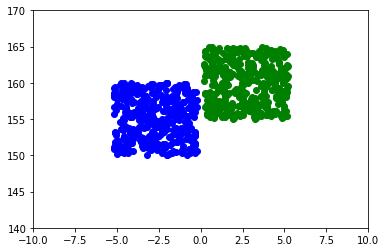

In [95]:
plt.scatter(class_1[:,0], class_1[:,1], color='g')
plt.scatter(class_2[:,0], class_2[:,1], color='b')
plt.xlim(-10,10)
plt.ylim(140,170)
plt.show()

#Perceptron part 2


In [96]:
train_data = np.genfromtxt('perceptron-train.txt')
test_data = np.genfromtxt('perceptron-test.txt')

In [97]:
def perceptron(train):
  train_features = train[:,:2]
  train_labels = train[:,-1]
  #w = np.ones((1,2))
  w = np.zeros((1,2))
  ite = 0
  flag=0
  while flag==0 :
    ite+=1
    idx=0
    for point in train_features:
      if train_labels[idx]*np.dot(w, point)<=0:
        w+= train_labels[idx]*point
        break
      idx+=1
    #print(w)
    if idx==len(train_features):
      flag=1
  return w, ite

In [98]:
weights, ite = perceptron(train_data)

In [99]:
weights

array([[12788.97707042,   -15.39486139]])

In [100]:
weights/=np.linalg.norm(weights)

In [101]:
weights

array([[ 0.99999928, -0.00120376]])

In [102]:
ite

10990

In [103]:
x = np.linspace(-5,5,100)
slope = (-1*weights[0][0]/weights[0][1])
y = slope*(x) 

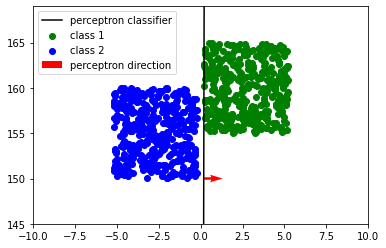

In [104]:
plt.scatter(class_1[:,0], class_1[:,1], color='g', label='class 1')
plt.scatter(class_2[:,0], class_2[:,1], color='b', label='class 2')
plt.plot(x, y, label='perceptron classifier', color = 'black')
plt.xlim(-10,10)
plt.ylim(145,169)
plt.quiver(0.2, 150, weights[0][0], weights[0][1], color ='red', label ="perceptron direction")
plt.legend()
plt.show()

#1) Plotting the points

In [105]:
def prcpt_acc(w, test):
  test_features = test[:,:2]
  test_labels = test[:,-1]
  class_1=[]
  class_2 =[]
  pred = []
  idx=0
  acc=0
  R =0
  gamma = 1000000000
  dist=[]
  for point in test_features:
    a= np.linalg.norm(point)**2
    dist.append(a)
  dist.sort()
  R = dist[len(dist)-1] 
  for point in test_features:
    y=0
    temp = test_labels[idx]*np.dot(w,point)
    if temp<gamma:
      gamma = temp
    if np.dot(w, point)>0:
      class_1.append(point)
      y=1
    else:
      class_2.append(point)
      y=-1
    pred.append(y)
    if test_labels[idx]==y:
      acc+=1
    idx+=1
  class_1 = np.array(class_1)
  class_2 = np.array(class_2)
  acc/=len(test_labels)
  return acc, class_1, class_2, gamma, R  

In [106]:
acc, c1, c2, gamma, R = prcpt_acc(weights, test_data)

In [107]:
acc

1.0

In [108]:
c1

array([[  2.26938253, 160.03778586],
       [  1.88111809, 157.78748767],
       [  3.56027558, 155.43212436],
       [  4.39335924, 158.72115101],
       [  0.25880204, 155.69928436],
       [  0.68720316, 160.51833292],
       [  2.49622421, 156.56028388],
       [  0.95320575, 164.59591754],
       [  2.70182509, 155.40569794],
       [  3.76286565, 156.13697324],
       [  1.74134186, 155.26205921],
       [  2.05612821, 162.23039154],
       [  4.04028076, 163.52630542],
       [  5.15387187, 163.10643388],
       [  0.22441589, 162.8847598 ],
       [  0.37106154, 160.01408393],
       [  2.00958243, 155.73596252],
       [  5.03865776, 157.01640353],
       [  4.62096976, 157.8706319 ],
       [  1.69650312, 158.89702045],
       [  4.76720571, 158.76327422],
       [  0.87762248, 157.99859652],
       [  2.68192914, 160.57785519],
       [  2.36571334, 161.28299861],
       [  3.58419666, 162.04693622],
       [  3.96252992, 164.72810102],
       [  4.11895775, 156.0281588 ],
 

In [109]:
c2

array([[ -3.70550632, 152.10930221],
       [ -2.56279168, 159.24228467],
       [ -4.90980588, 152.66106863],
       [ -1.65054977, 158.18208912],
       [ -3.85890073, 152.11952211],
       [ -2.6984778 , 158.47945581],
       [ -1.43984039, 157.19127492],
       [ -5.06480238, 153.82528276],
       [ -1.64869   , 153.82716251],
       [ -0.59210246, 151.12182274],
       [ -0.27119806, 154.32953659],
       [ -1.20556513, 150.84406236],
       [ -1.56909616, 158.70851852],
       [ -3.92021946, 152.65262762],
       [ -4.72247505, 159.94988405],
       [ -1.28216423, 156.51459454],
       [ -2.69860741, 154.21895822],
       [ -4.44925881, 158.37515073],
       [ -2.48758909, 157.2739272 ],
       [ -2.84690316, 156.8148122 ],
       [ -2.23292261, 157.25565086],
       [ -2.66052839, 157.11898538],
       [ -0.87774247, 152.35332229],
       [ -1.2035181 , 152.73707014],
       [ -4.74957251, 150.47257076],
       [ -3.89286594, 155.4350591 ],
       [ -2.08929263, 155.25729677],
 

test data

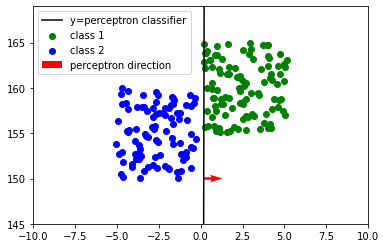

In [110]:
x = np.linspace(-5,5,100)
slope = (-1*weights[0][0]/weights[0][1])
y = slope*(x) 
plt.scatter(c1[:,0], c1[:,1], color='g', label='class 1')
plt.scatter(c2[:,0], c2[:,1], color='b', label='class 2')
plt.plot(x, y, 'g',color = 'black', label='y=perceptron classifier')
#plt.plot(x, w*x)
plt.xlim(-10,10)
plt.ylim(145,169)
plt.quiver(0.2, 150, weights[0][0], weights[0][1], color ='red', label ="perceptron direction")
plt.legend()
plt.show()

#2) R and gamma


In [111]:
print(gamma)

[0.01691199]


In [112]:
print(R)

27226.245421730233


In [113]:
(R/gamma)**2

array([2.59170821e+12])

#3) number of iterations

In [59]:
ite

10990

#Q3) Perceptron-Biased Train

In [115]:
train_data = np.genfromtxt('perceptron-biased-train.txt')
test_data = np.genfromtxt('perceptron-biased-test.txt')

In [116]:
d=np.array([1.,2.,3.])
e = np.array([4.,5.,6.])
x=[]
x.append(d)
x.append(e)
x= np.array(x)
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [117]:
def perceptron(train):
  train_features =[]
  for i in range(len(train)):
    train_features.append(train[i][:3])
  train_labels = []
  for i in range(len(train)):
    train_labels.append(train[i][-1])
  #w = np.ones((1,3))
  w = np.zeros((1,3))
  ite = 0
  flag=0
  while flag==0:
    ite+=1
    idx=0
    for point in train_features:
      if train_labels[idx]*np.dot(w, point)<=0:
        w+= train_labels[idx]*point
        break
      idx+=1
    #print(w)
    if idx==len(train_features):
      flag=1
  return w, ite

In [118]:
def prcpt_acc(w, test):
  test_features = []
  test_labels = []
  for i in range(len(test)):
    test_features.append(test[i][:3])
  for i in range(len(test)):
    test_labels.append(test[i][-1])
  class_1=[]
  class_2 =[]
  pred = []
  idx=0
  acc=0
  R =0
  gamma = 1000000000
  dist=[]
  for point in test_features:
    a= np.linalg.norm(point)**2
    dist.append(a)
  dist.sort()
  R = dist[len(dist)-1] 
  for point in test_features:
    y=0
    temp = test_labels[idx]*np.dot(w,point)
    if temp<gamma:
      gamma = temp
    if np.dot(w, point)>0:
      class_1.append(point)
      y=1
    else:
      class_2.append(point)
      y=-1
    pred.append(y)
    if test_labels[idx]==y:
      acc+=1
    idx+=1
  class_1 = np.array(class_1)
  class_2 = np.array(class_2)
  acc/=len(test_labels)
  return acc, class_1, class_2, gamma, R  

#new

In [119]:
train_data = open("perceptron-biased-train.txt")
test_data = open("perceptron-biased-test.txt")

In [120]:
training = train_data.read()
train_data.seek(0)
training = training.split('\n')
training

['42.49571730433321 \t 164.10344185281997 \t 1.0',
 '45.46175554444283 \t 162.4722537682041 \t 1.0',
 '42.376840364175024 \t 159.59195760137703 \t 1.0',
 '43.94009330483983 \t 156.261042393107 \t 1.0',
 '36.144297003392715 \t 159.5434842260548 \t -1.0',
 '44.6766615475057 \t 155.10709648362885 \t 1.0',
 '42.59995375349971 \t 162.10458454459408 \t 1.0',
 '36.29778975158964 \t 157.63400896876732 \t -1.0',
 '41.66284764245233 \t 157.308632964151 \t 1.0',
 '43.29022066242341 \t 158.04550882734972 \t 1.0',
 '44.19936812418752 \t 164.11045442614113 \t 1.0',
 '36.555062484166065 \t 154.23443144354235 \t -1.0',
 '45.0144416188403 \t 161.19956132495156 \t 1.0',
 '36.19935267368467 \t 150.54730385497896 \t -1.0',
 '42.562444057708504 \t 164.0123946134914 \t 1.0',
 '38.92583961927705 \t 150.46651409708585 \t -1.0',
 '36.632311692926464 \t 158.68441141071375 \t -1.0',
 '36.455487413076746 \t 150.47275070044364 \t -1.0',
 '45.250598349990675 \t 160.30609963831438 \t 1.0',
 '35.520908754499004 \t 15

make sure there are no empty lines in the dataset

In [121]:
training_data = []
cluster_1 = []
cluster_2 = []
for i in range(len(training)):
  x1, x2, y = training[i].split('\t')
  lst = np.array([float(x1), float(x2), float(1), float(y)])
  #lst = np.array(lst)
  training_data.append(lst)
  if float(y)==1:
    cluster_1.append((float(x1), float(x2)))
  else:
    cluster_2.append((float(x1), float(x2)))
print(type(lst))
print(type(lst[0]))

<class 'numpy.ndarray'>
<class 'numpy.float64'>


In [122]:
training_data

[array([ 42.4957173 , 164.10344185,   1.        ,   1.        ]),
 array([ 45.46175554, 162.47225377,   1.        ,   1.        ]),
 array([ 42.37684036, 159.5919576 ,   1.        ,   1.        ]),
 array([ 43.9400933 , 156.26104239,   1.        ,   1.        ]),
 array([ 36.144297  , 159.54348423,   1.        ,  -1.        ]),
 array([ 44.67666155, 155.10709648,   1.        ,   1.        ]),
 array([ 42.59995375, 162.10458454,   1.        ,   1.        ]),
 array([ 36.29778975, 157.63400897,   1.        ,  -1.        ]),
 array([ 41.66284764, 157.30863296,   1.        ,   1.        ]),
 array([ 43.29022066, 158.04550883,   1.        ,   1.        ]),
 array([ 44.19936812, 164.11045443,   1.        ,   1.        ]),
 array([ 36.55506248, 154.23443144,   1.        ,  -1.        ]),
 array([ 45.01444162, 161.19956132,   1.        ,   1.        ]),
 array([ 36.19935267, 150.54730385,   1.        ,  -1.        ]),
 array([ 42.56244406, 164.01239461,   1.        ,   1.        ]),
 array([ 3

In [123]:
testing = test_data.read()
test_data.seek(0)
testing = testing.split('\n')
testing

['41.26653706854232 \t 157.74181115160368 \t 1.0',
 '37.082217009476906 \t 157.21952222296255 \t -1.0',
 '45.8578585659086 \t 158.68659070685996 \t 1.0',
 '35.25261114045437 \t 150.72232031220366 \t -1.0',
 '41.16775449580184 \t 156.62874446256717 \t 1.0',
 '43.81954375135576 \t 156.0294544383547 \t 1.0',
 '41.84014965879043 \t 160.81039770451133 \t 1.0',
 '36.235609014939115 \t 153.65367019384428 \t -1.0',
 '45.102017511472866 \t 157.31674831445073 \t 1.0',
 '35.024360413990095 \t 159.59718141147977 \t -1.0',
 '41.47219528741241 \t 163.64685454641565 \t 1.0',
 '41.87756105906809 \t 160.8547370764361 \t 1.0',
 '45.24972293158188 \t 157.88479905896503 \t 1.0',
 '36.70244876292301 \t 153.29742147564352 \t -1.0',
 '42.73391007508509 \t 157.6813911931891 \t 1.0',
 '44.820965177747304 \t 155.53294290921437 \t 1.0',
 '42.702934019997215 \t 158.00773575865188 \t 1.0',
 '36.00922145015646 \t 152.52592686114957 \t -1.0',
 '36.27566203198363 \t 151.24445391734344 \t -1.0',
 '41.51666290680976 \t

make sure there are no empty lines in the dataset

In [124]:
testing_data = []
cluster_1 = []
cluster_2 = []
for i in range(len(testing)):
  x1, x2, y = testing[i].split('\t')
  lst = np.array([float(x1), float(x2), float(1), float(y)])
  #lst = np.array(lst)
  testing_data.append(lst)
  if float(y)==1:
    cluster_1.append((float(x1), float(x2)))
  else:
    cluster_2.append((float(x1), float(x2)))
print(type(lst))
print(type(lst[0]))

<class 'numpy.ndarray'>
<class 'numpy.float64'>


In [125]:
weights, iteration = perceptron(training_data)

In [126]:
weights

array([[   6846.96288997,    -558.85511217, -189197.        ]])

In [133]:
weights/=np.linalg.norm(weights)
weights

array([[ 0.03616576, -0.00295188, -0.99934145]])

In [134]:
iteration

4656250

In [135]:
acc, class_1, class_2, gamma, R = prcpt_acc(weights, testing_data)

In [136]:
acc

1.0

In [137]:
gamma

array([0.00079295])

In [138]:
R

29152.2028163804

In [139]:

R**2/gamma**2

array([1.35160116e+15])

In [ ]:
class_1

In [ ]:
class_2

In [ ]:
x = np.linspace(35,45,100)
slope = (-1*weights[0][0]/weights[0][1])
y = slope*(x) -weights[0][2]/weights[0][1]
plt.scatter(class_1[:,0], class_1[:,1], color='g', label='class 1')
plt.scatter(class_2[:,0], class_2[:,1], color='b', label='class 2')
plt.plot(x, y, 'g', label='perceptron classifier', color = 'black')
plt.quiver(40, 150, weights[0][0], weights[0][1], color ='red', label ="perceptron direction")
plt.legend()
plt.show()